<a href="https://colab.research.google.com/github/indhujaya2014-web/project4_Diamond-Dynamics-Price-Prediction-and-Market-Segmentation/blob/main/Project_4_Diamond_Dynamics_Price_Prediction_and_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (53940, 10)
--------------------------------------------

Columns: Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
--------------------------------------------

First 5 rows:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


--------------------------------------------

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
--------------------------------------------

Missing Values:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
--------------------------------------------

Duplicate Rows: 146
--------------------------------------------

Sum

,carat,price_inr,volume,carat_category
0,0.23,29529.08,38.202030,Light
1,0.21,29529.08,34.505856,Light
2,0.23,29619.66,38.076885,Light
3,0.29,30253.72,46.724580,Light
4,0.31,30344.30,51.917250,Light


--------------------------------------------

Handling outliers:
(49510, 15)
--------------------------------------------


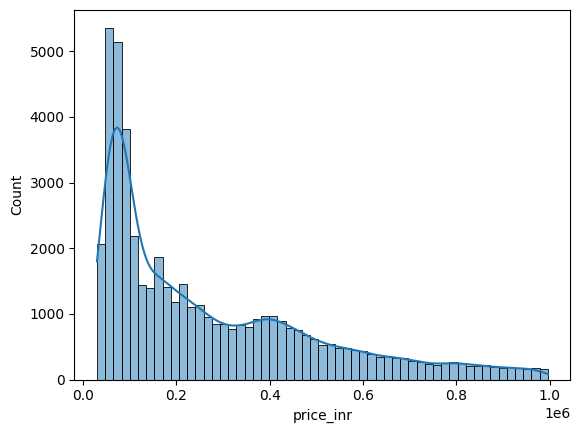

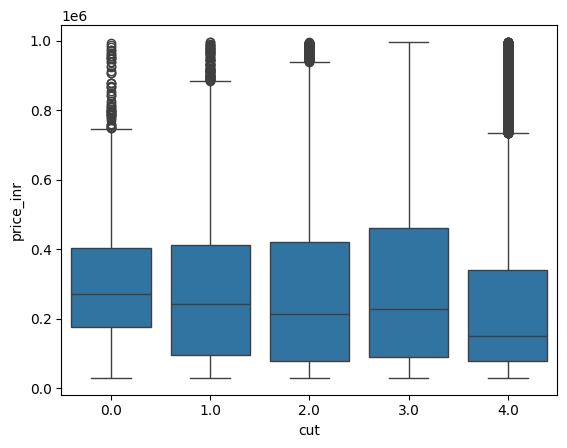

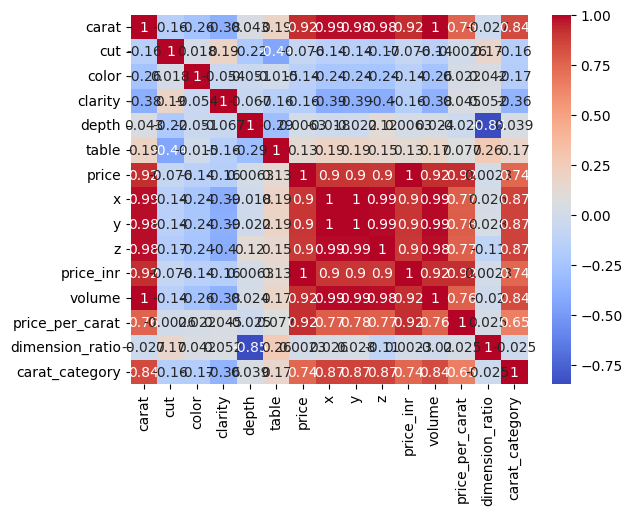

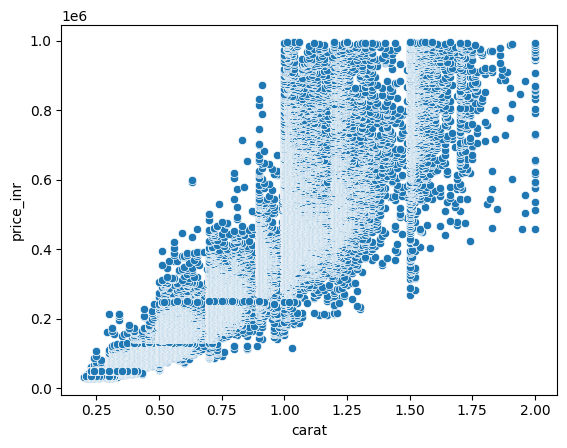

--------------------------------------------
(39608, 10) (9902, 10) (39608,) (9902,)
--------------------------------------------
                        MAE          RMSE        R2
Linear         47690.113782  68708.778701  0.913739
Decision Tree  23692.065587  42695.058452  0.966692
Random Forest  17689.106378  31281.209762  0.982120
KNN            22920.803385  39947.026743  0.970842
XGBoost        18166.136135  31285.859129  0.982115

Best Model: Random Forest - 0.9821203552924526
--------------------------------------------


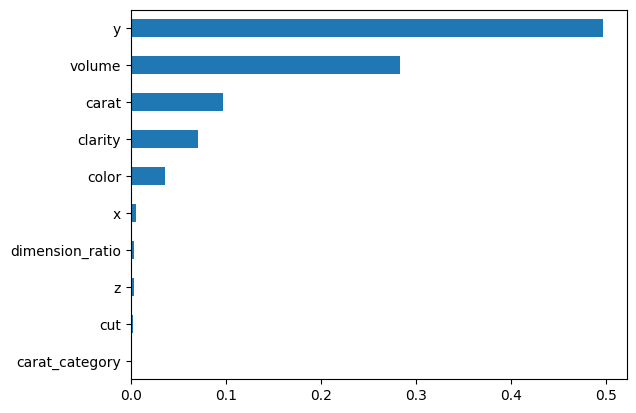

--------------------------------------------


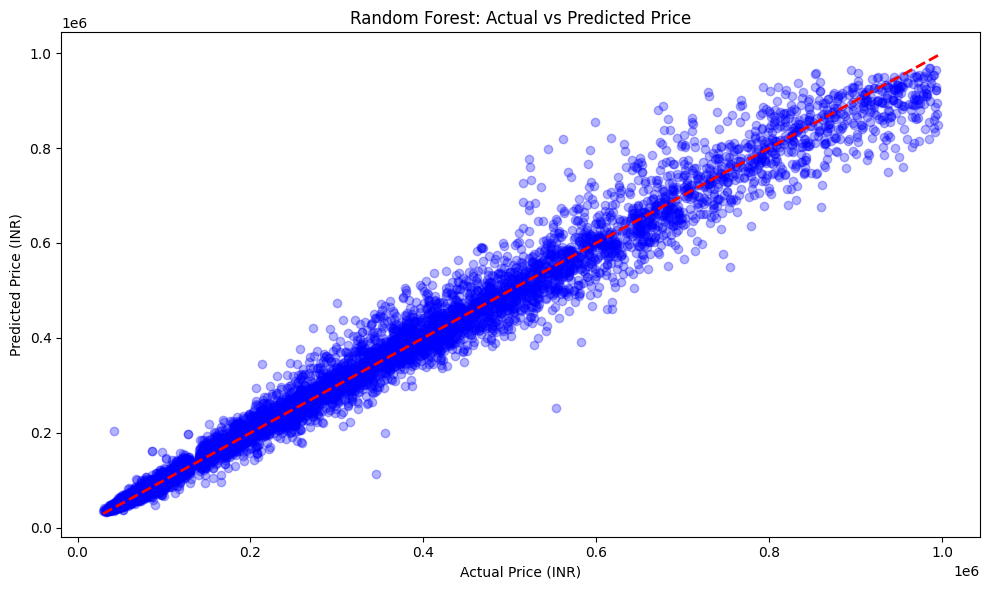

/tmp/ipython-input-168618580.py:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


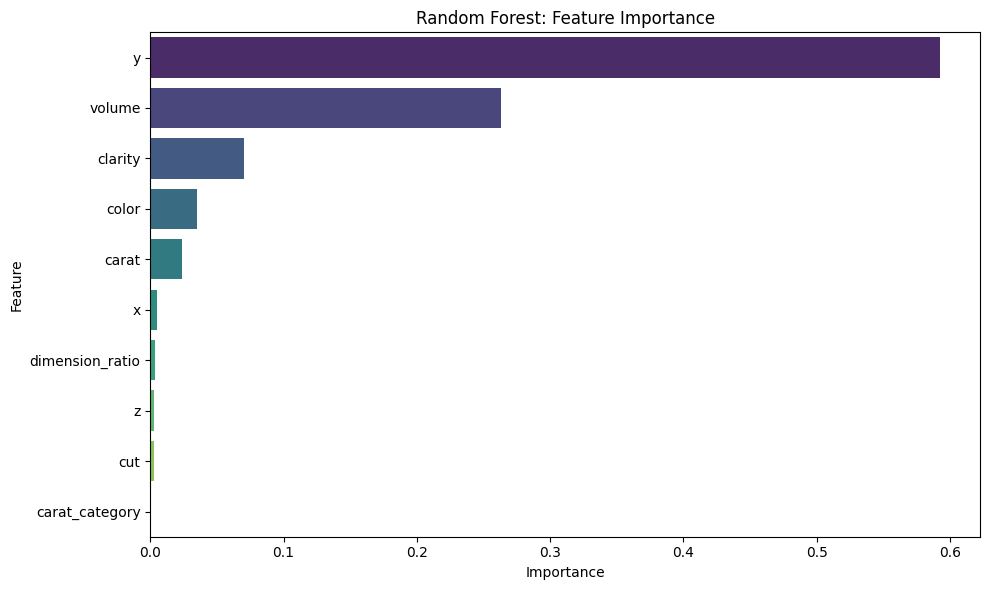

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
991/991 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 126749319168.0000 - mae: 270763.1562 - val_loss: 114369323008.0000 - val_mae: 254783.4219
Epoch 2/50
991/991 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 100292665344.0000 - mae: 236280.2812 - val_loss: 57271218176.0000 - val_mae: 170351.9375
Epoch 3/50
991/991 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 44757475328.0000 - mae: 147634.2812 - val_loss: 19318470656.0000 - val_mae: 92959.8984
Epoch 4/50
991/991 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17002065920.0000 - mae: 87318.3594 - val_loss: 12388288512.0000 - val_mae: 75184.6562
Epoch 5/50
991/991 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 12101344256.0000 - mae: 73856.5938 - val_loss: 8893881344.0000 - val_mae: 63450.6641
Epoch 6/50
991/991 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8357151232.0000 - mae: 61237.4258 - val_loss: 6314465792.0000 - val_mae: 53776.6250
Epoch 7/50
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6021892096.0000 - mae: 52588.7227 - val_loss: 5047285760.00

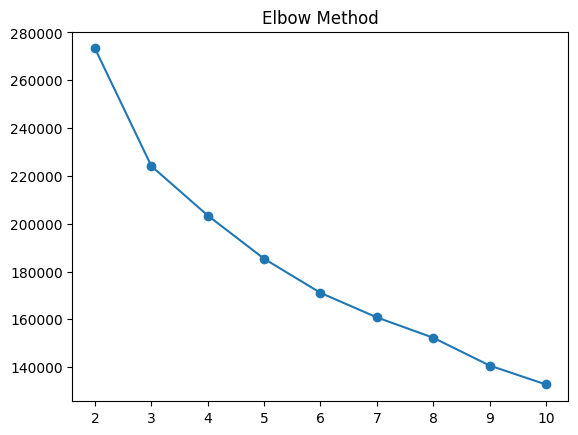

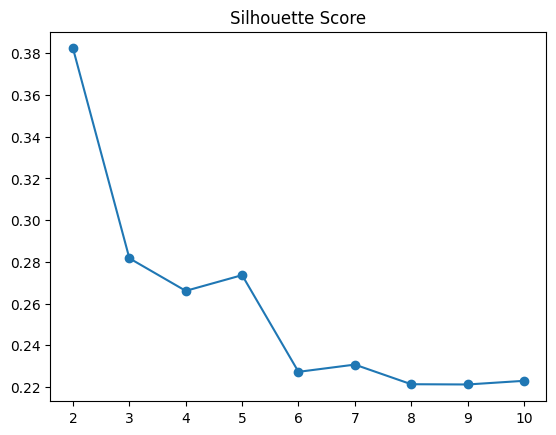

Cluster Price Profiles (Sorted):



,price_inr
cluster,
1,71769.560169
2,205861.011003
0,537623.877625


--------------------------------------------


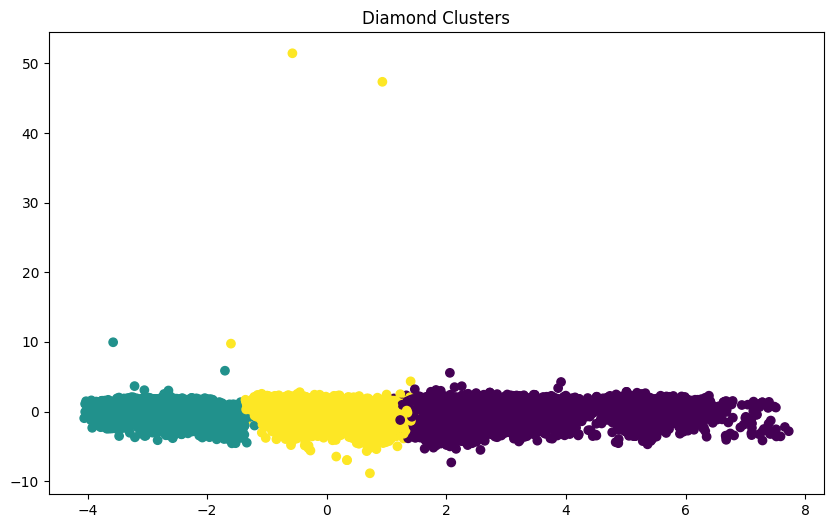

['cluster_model.pkl']

In [1]:
#IMPORTS
#Core
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, silhouette_score

# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Utilities
import joblib

# LOAD DATA
#df = sns.load_dataset('diamonds') # using sns load dataset
df = pd.read_csv('diamonds.csv') # using pd read data

print("Shape:", df.shape)
print("--------------------------------------------")
print("\nColumns:", df.columns)
print("--------------------------------------------")
print("\nFirst 5 rows:")
display(df.head())
print("--------------------------------------------")
print("\nInfo:")
df.info()
print("--------------------------------------------")
print("\nMissing Values:\n", df.isnull().sum())
print("--------------------------------------------")
print("\nDuplicate Rows:", df.duplicated().sum())
print("--------------------------------------------")
print("\nSummary Statistics:\n", df.describe())
print("--------------------------------------------")

# PREPROCESSING & FEATURE ENGINEERING
# Remove invalid dimensions
df[['x', 'y', 'z']] = df[['x', 'y', 'z']].replace(0, np.nan)
#df.dropna(inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# Converting price USD into INR
USD_TO_INR = 90.58
df['price_inr'] = df['price'] * USD_TO_INR

# Feature Engineering
df['volume'] = df['x'] * df['y'] * df['z']
df['price_per_carat'] = df['price_inr'] / df['carat']
df['dimension_ratio'] = (df['x'] + df['y']) / (2 * df['z'])

df['carat_category'] = pd.cut(
    df['carat'], bins=[0, 0.5, 1.5, np.inf],
    labels=['Light', 'Medium', 'Heavy'],
    right=False # Ensure bins are inclusive on the left, exclusive on the right
)

print("\nFeature engineering")
display(df[['carat', 'price_inr', 'volume', 'carat_category']].head())
print("--------------------------------------------")

# ENCODING (Ordinal for Cut, Color, Clarity)
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
carat_cat = ['Light', 'Medium', 'Heavy']

encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories, carat_cat])
df[['cut', 'color', 'clarity', 'carat_category']] = encoder.fit_transform(df[['cut', 'color', 'clarity', 'carat_category']])

# Handling outliers
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

for col in ['carat','x','y','z','price_inr']:
    df = remove_outliers_iqr(df, col)
print("\nHandling outliers:")
print(df.shape)
print("--------------------------------------------")

# Skewness Handling
df[['carat','x','y','z','price_inr']].skew()

# Exploratory Data Analysis (EDA)
sns.histplot(df['price_inr'], kde=True)
plt.show()

sns.boxplot(x=df['cut'], y=df['price_inr'])
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot = True, cmap='coolwarm')
plt.show()

sns.scatterplot(x=df['carat'], y=df['price_inr'])
plt.show()
print("--------------------------------------------")

# FEATURE SELECTION
feature_cols = [
    'carat','cut','color','clarity','x','y','z',
    'volume',
    'dimension_ratio','carat_category'
]

X = df[feature_cols]
y = df['price_inr']


# REGRESSION MODEL (Price Prediction)
# X = df.drop(['price', 'price_inr'], axis=1)
# y = df['price_inr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("--------------------------------------------")
# Models
models = {
    "Linear": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror')
}

def evaluate(model):
    pred = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, pred)),
        "R2": r2_score(y_test, pred)
    }

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate(model)

results_df = pd.DataFrame(results).T
print(results_df.to_string())

# best_model = max(results, key=lambda k: results[k]['R2'])
best_model = results_df['R2'].idxmax()
print(f"\nBest Model: {best_model} - {results_df.loc[best_model,'R2']}")
print("--------------------------------------------")

# Feature Importance
rf_temp = RandomForestRegressor()
rf_temp.fit(X, y)

pd.Series(rf_temp.feature_importances_, index=X.columns).sort_values().plot(kind='barh')
plt.show()
print("--------------------------------------------")

# Best performer usually: XGBoost or Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_test)

# Plots
# Plot 1: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (INR)')
plt.ylabel('Predicted Price (INR)')
plt.title('Random Forest: Actual vs Predicted Price')
plt.tight_layout()
plt.show()
#plt.savefig('rf_actual_vs_predicted.png')
plt.close()

# Plot 2: Feature Importance
importances = model_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest: Feature Importance')
plt.tight_layout()
plt.show()
#plt.savefig('rf_feature_importance.png')
plt.close()

# ANN Regression (TensorFlow)
scaler_ann = StandardScaler()
X_train_s = scaler_ann.fit_transform(X_train)
X_test_s = scaler_ann.transform(X_test)

ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

ann.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

ann.fit(
    X_train_s, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

ann_pred = ann.predict(X_test_s)
print(f"\nANN R2 Score: {r2_score(y_test, ann_pred):.4f}")

# CLUSTERING (Market Segmentation)
# We drop price to cluster based on physical attributes
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(X)

sil_scores = []
inertia_values = [] # Renamed to avoid conflict with function call
for k in range(2,11):
  km = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress warning
  labels = km.fit_predict(cluster_scaled)
  inertia_values.append(km.inertia_)
  print(f"Inertia for k={k}: {km.inertia_}")
  sil_scores.append(silhouette_score(cluster_scaled, labels))
  print(f"Silhouette Score for k={k}: {silhouette_score(cluster_scaled, labels)}")

plt.plot(range(2,11), inertia_values, marker='o')
plt.title("Elbow Method")
plt.show()

plt.plot(range(2,11), sil_scores, marker='o') # Changed 'silhouette' to 'sil_scores'
plt.title("Silhouette Score")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added n_init
df['cluster'] = kmeans.fit_predict(cluster_scaled)
print("Cluster Price Profiles (Sorted):\n")
display(df.groupby('cluster')['price_inr'].mean().sort_values())
print("--------------------------------------------")

# Cluster Naming
cluster_names = {
    0: "Affordable Small Diamonds",
    1: "Mid-range Balanced Diamonds",
    2: "Premium Heavy Diamonds"
}
df['cluster_name'] = df['cluster'].map(cluster_names)

import json
with open('cluster_names.json', 'w') as f:
    json.dump(cluster_names, f)

# PCA Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(cluster_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=df['cluster'])
plt.title("Diamond Clusters")
plt.show()

# SAVE
joblib.dump(models['Random Forest'], 'price_model.pkl')
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'cluster_model.pkl')

In [2]:
print(df.groupby('cluster')['price_inr'].mean().sort_values())

cluster
1     71769.560169
2    205861.011003
0    537623.877625
Name: price_inr, dtype: float64


In [3]:
!pip install -q streamlit
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
import subprocess
subprocess.Popen(["./cloudflared-linux-amd64", "tunnel", "--url", "http://localhost:8501"])
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.6 MB/s eta 0:00:00
--2026-02-16 10:13:53--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2026.2.0/cloudflared-linux-amd64 [following]
--2026-02-16 10:13:53--  https://github.com/cloudflare/cloudflared/releases/download/2026.2.0/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/f9298ca8-89c8-41fe-a51f-e24cb2059878?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-16T10%3A48%3A33Z&rscd=attachment%3B+filename%3Dclo

In [8]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import joblib
import numpy as np

# Load models
price_model = joblib.load(open('price_model.pkl', 'rb'))
cluster_model = joblib.load(open('cluster_model.pkl', 'rb'))
scaler = joblib.load(open('scaler.pkl', 'rb'))

try:
    with open('cluster_names.json', 'r') as f:
        Cluster_names = json.load(f)
except:
    # Fallback if JSON missing
    Cluster_names = {0: "Affordable Small Diamonds", 1: "Mid-range Balanced Diamonds", 2: "Premium Heavy Diamonds"}

st.title("💎 Diamond Analytics: Price & Market Segment Predictor")

# Sidebar Inputs
st.sidebar.header("Diamond Attributes")
carat = st.sidebar.number_input("Carat Weight", 0.2, 5.0, 1.0)
cut = st.sidebar.selectbox("Cut", ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
color = st.sidebar.selectbox("Color", ['D', 'E', 'F', 'G', 'H', 'I', 'J'])
clarity = st.sidebar.selectbox("Clarity", ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
x = st.sidebar.number_input("X", 3.0, 10.0, 5.0)
y = st.sidebar.number_input("Y", 3.0, 10.0, 5.0)
z = st.sidebar.number_input("Z", 2.0, 6.0, 3.0)

cut_m = {"Fair":0,"Good":1,"Very Good":2,"Premium":3,"Ideal":4}
color_m = {"D":0,"E":1,"F":2,"G":3,"H":4,"I":5,"J":6}
clarity_m = {"IF":0,"VVS1":1,"VVS2":2,"VS1":3,"VS2":4,"SI1":5,"SI2":6,"I1":7}

# Logic for carat_category
if carat < 0.5:
  c_cat_num = 0  #Light
elif carat <= 1.5:
  c_cat_num = 1  #Medium
else:
  c_cat_num = 2    #Heavy

volume = x*y*z
#price_per_carat = 0
dimension_ratio = (x+y)/(2*z)


input_df = np.array([[
        carat,
        cut_m[cut],
        color_m[color],
        clarity_m[clarity],
        x,
        y,
        z,
        volume,
      #  price_per_carat,
        dimension_ratio,
        c_cat_num
]])


if st.button("Predict Price"):
  try:
      # 1. Price Prediction
      price_pred = price_model.predict(input_df)[0]
      st.success(f"Estimated Price: ₹{price_pred:,.2f}")

      # 2. Cluster Prediction
      input_scaled = scaler.transform(input_df)
      cluster = cluster_model.predict(input_scaled)[0]

      st.info(f"Market Segment: {Cluster_names[cluster]}")
  except Exception as e:
      st.error(f"Prediction Error: {e}")
      st.warning("Ensure the model was trained with the same 12 features used here.")

Overwriting app.py


In [6]:
!streamlit run /content/app.py &>/content/logs.txt &

In [7]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"

Your tunnel url https://fell-reason-montgomery-brochures.trycloudflare.com


In [9]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,price_inr,volume,price_per_carat,dimension_ratio,carat_category,cluster,cluster_name
0,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43,29529.08,38.202030,128387.304348,1.631687,0.0,1,Mid-range Balanced Diamonds
1,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31,29529.08,34.505856,140614.666667,1.673160,0.0,1,Mid-range Balanced Diamonds
2,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31,29619.66,38.076885,128781.130435,1.757576,0.0,1,Mid-range Balanced Diamonds
3,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63,30253.72,46.724580,104323.172414,1.602662,0.0,1,Mid-range Balanced Diamonds
4,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75,30344.30,51.917250,97884.838710,1.580000,0.0,1,Mid-range Balanced Diamonds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,60.8,57.0,2757,5.75,5.76,3.50,249729.06,115.920000,346845.916667,1.644286,1.0,2,Premium Heavy Diamonds
53936,0.72,1.0,6.0,2.0,63.1,55.0,2757,5.69,5.75,3.61,249729.06,118.110175,346845.916667,1.584488,1.0,2,Premium Heavy Diamonds
53937,0.70,2.0,6.0,2.0,62.8,60.0,2757,5.66,5.68,3.56,249729.06,114.449728,356755.800000,1.592697,1.0,2,Premium Heavy Diamonds
53938,0.86,3.0,2.0,1.0,61.0,58.0,2757,6.15,6.12,3.74,249729.06,140.766120,290382.627907,1.640374,1.0,0,Affordable Small Diamonds


In [ ]:
from google.colab import files
df.to_csv('edited_diamond_data.csv', index=False)
files.download('edited_diamond_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>